0
x_train_shape: (60000, 28, 28, 1)
no of train images: 60000
no of test images: 10000






Using TensorFlow backend.


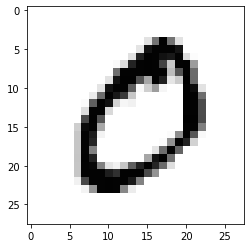

In [2]:
# Fetching the train && test data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#other usefull libs
import matplotlib.pyplot as plt
import pickle

image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

x_train.shape #printing shape

# Reshaping the array 
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
# Making sure X is of type Float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing 
x_train/= 255
x_test/= 255
print('x_train_shape:',x_train.shape)
print('no of train images:',x_train.shape[0])
print('no of test images:',x_test.shape[0])

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# creating sequential model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flattening the 2D array
model.add(Flatten())
# Adding dense layer
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


In [3]:

#compile and fit the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 26s 439us/step - loss: 0.1589 - acc: 0.9507
Epoch 2/10
28040/60000 [=============>................] - ETA: 13s - loss: 0.0599 - acc: 0.9808

KeyboardInterrupt: 

In [4]:
import cv2

cap = cv2.VideoCapture(0)

# width = int(cap.get(CAP_PROP_WIDTH))
# height = int(cap.get(CAP_PROP_HEIGHT))

while True:

	ret, frame = cap.read()

	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	cv2.circle(frame, (100, 400), 70, (0, 0, 255), 15)

	cv2.imshow('Application', frame)
	if cv2.waitKey(1) & 0xFF == ord('q'):
		break

cap.release()
cv2.destroyAllWindows()